In [1]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

In [2]:
# 函数式API
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 多输入模型
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None, ), dtype='int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question],axis=1)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 32)     320000      question[0][0]                   
_______________________________________________________________________________________

In [10]:
import numpy as np
import keras

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))

answers = np.random.randint(answer_vocabulary_size, size=(num_samples))
answers = keras.utils.to_categorical(answers, answer_vocabulary_size)

history = model.fit([text, question], answers, epochs=150, batch_size=128, validation_split=0.2)

Epoch 1/150
7/7 [==============================] - 1s 192ms/step - loss: 7.5949 - acc: 0.0037 - val_loss: 7.5538 - val_acc: 0.0050
Epoch 2/150
7/7 [==============================] - 0s 66ms/step - loss: 6.8568 - acc: 0.0075 - val_loss: 7.4960 - val_acc: 0.0100
Epoch 3/150
7/7 [==============================] - 0s 66ms/step - loss: 6.4029 - acc: 0.0063 - val_loss: 7.3506 - val_acc: 0.0050
Epoch 4/150
7/7 [==============================] - 0s 67ms/step - loss: 6.0558 - acc: 0.0188 - val_loss: 7.3841 - val_acc: 0.0000e+00
Epoch 5/150
7/7 [==============================] - 0s 68ms/step - loss: 5.7747 - acc: 0.0262 - val_loss: 7.3725 - val_acc: 0.0050
Epoch 6/150
7/7 [==============================] - 0s 68ms/step - loss: 5.5398 - acc: 0.0437 - val_loss: 7.3376 - val_acc: 0.0050
Epoch 7/150
7/7 [==============================] - 0s 65ms/step - loss: 5.4055 - acc: 0.0463 - val_loss: 7.3656 - val_acc: 0.0000e+00
Epoch 8/150
7/7 [==============================] - 0s 66ms/step - loss: 5.1537 - 

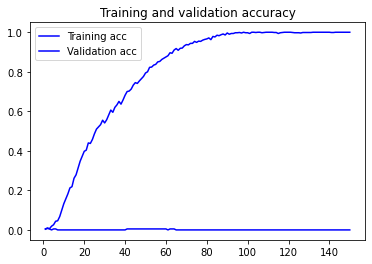

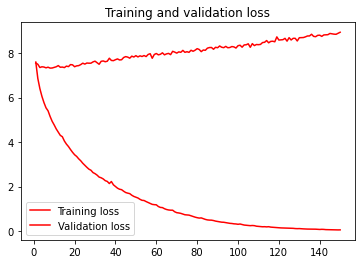

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [13]:
# 多输出模型
vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])
model.summary()

model.compile(optimizer='rmsprop', 
              loss={'age':'mse', 
                    'income':'categorical_crossentropy',
                    'gender':'binary_crossentropy'
                    }, 
              loss_weights={'age': 0.25,
                            'income': 1.,
                            'gender': 10.
                            }
              )

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 50000)  12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, None, 128)    32000128    embedding_5[0][0]                
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, None, 128)    0           conv1d_5[0][0]                   
_______________________________________________________________________________________

In [ ]:
model.fit(posts, 
          {'age': age_targets,
           'income': income_targets,
           'gender': gender_targets},
          epochs=10,
          batch_size=64)